# Demo: Sampling with LoRA in Diffusion Models

Sample with vanilla Stable Diffusion.

100%|██████████| 50/50 [00:04<00:00, 10.45it/s]


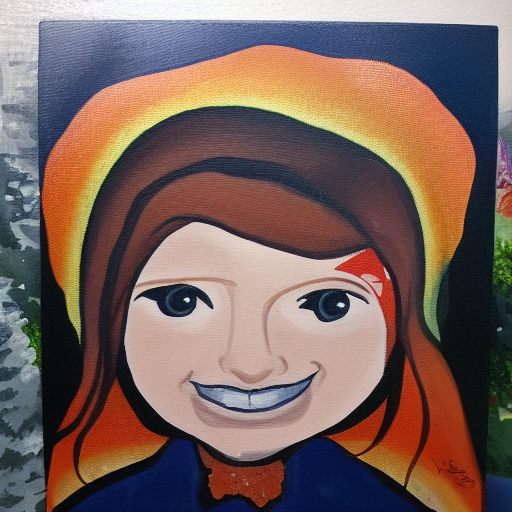

In [11]:
from diffusers import DiffusionPipeline, StableDiffusionPipeline, EulerAncestralDiscreteScheduler, StableDiffusionImg2ImgPipeline
import torch
import time

model_id = "../stable-diffusion/stable-diffusion-1-5"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda"
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

# necessary for outputing attack performance 0.23.0
def dummy(images, **kwargs):
    return images, [False] * images.shape[0]
pipe.safety_checker = dummy 

prompt = "a painting of a sks person, high quality, masterpiece"
torch.manual_seed(time.time())
image = pipe(prompt, num_inference_steps=50, guidance_scale=7).images[0]

image  # nice. diffusers are cool.

Sample with LoRA in Stable Diffusion

100%|██████████| 25/25 [00:02<00:00, 10.73it/s]


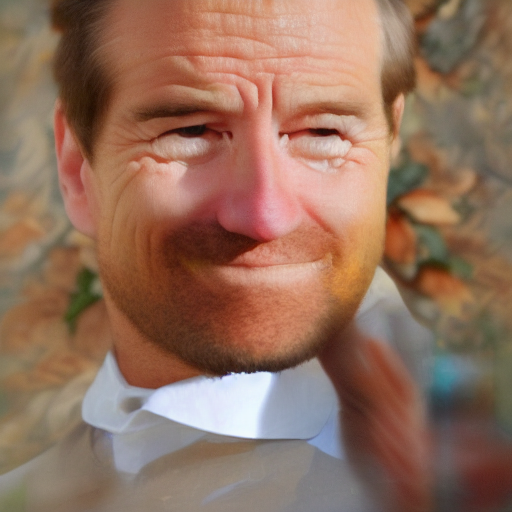

In [31]:
# lora_model_path = '../output/lora/sd1-5_adv/pytorch_lora_weights.safetensors'
lora_model_path = '../output/lora/sd1-5_adv/pytorch_lora_weights.safetensors'
# lora_model_path = '../output/lora/sd1-5/pytorch_lora_weights.safetensors'
pipe.unet.load_attn_procs(lora_model_path)



pipe.to("cuda")
# use half the weights from the LoRA finetuned model and half the weights from the base model
torch.manual_seed(time.time())
image = pipe(

    "a portrait of a sks person, high quality, masterpiece", num_inference_steps=25, guidance_scale=7.5, cross_attention_kwargs={"scale": 1.0}

).images[0]
# use the weights from the fully finetuned LoRA model

image.save("lora_sample.png")

image